# <center>Welcome to oLIMpus Tutorial #1!</center>
### <center>By S. Libanore</center>
oLIMpus is a fully analytical effective model to study LIM auto- and cross- power spectra durning the EoR. 

Our work builds on the 21-cm effective model presented in Zeus21 (Munoz 2023), which is contained as a submodule of our package.

#### In this notebook you will learn how to...
- choose and set up the inputs for running the code
- produce analytical auto- and cross- star-forming lines power spectra, including shot noise and power spectra

## General definitions

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import astropy.units as u 

The main outputs of oLIMpus are are classes containing the two point real space correlation function and the power spectrum of an input line.

Based on the oLIMpus paper, we recall that we rely on the smoothed density field $\delta_R$, on the lognormal approximation of the line luminosity density and on the EPS formalism to write 
$$
P_\nu (k,z) = {\rm FT}\biggl[\frac{\langle e^{\gamma_1\delta_{R_1}^2+\gamma_1^{\rm NL}\delta_{R_1}^2} e^{\gamma_2\delta_{R_2}^2+\gamma_2^{\rm NL}\delta_{R_2}^2}\rangle}{\mathcal{N}_1\mathcal{N}_2}
\biggr] \\

={\rm FT}\biggl[\left(c_1^{\rm LIM}(z)c_2^{\rm LIM}(z,R_0)\right)^2 \left(\exp(N^{R_0}/D^{R_0} -\log C^{R_0})-1\right)\biggr]\\
$$

where $R_1=R_2=R_0$ since line emission is a local process, 
$$
c_1^{\rm LIM}(z) = \frac{c}{4\pi\nu_{\rm rest}H(z)}\\

c_2^{\rm LIM}(z,R_0) = \bar{\rho}_L(z)/\mathcal{N}_{R_0}
$$
while $N^{R_0}$, $D^{R_0}$ and $C^{R_0}$ are analytically computed from the two point function of the two lognormal distributions. The two point function can be also approximated using only the first order in the lognormal approximation.

oLIMpus can also compute the two point function and power spectrum for 21-cm, based on its Zeus21 module. We refer to the Zeus21 papers for detailed formalism. 

In [2]:
import oLIMpus.analysis as a 

## Compute the LIM auto-power spectrum

In the **analysis.py** module, oLIMpus provides a class through which all outputs are computed consistently. The class allows to pass as inputs the most relevant astrophysical parameters, while other parameters are set to their default values. 

We start by presenting this output, while in Tutorial #3 we show how pass further inputs or to compute the outputs separately.

Inputs are:
- LINE (str) : which line to analyse, default OIII, other options OII, Ha, Hb, CO21; see **inputs_LIM.py**, **LIM_luminosities.py** for detail

- LINE_MODEL (str) : luminoisty model, default Yang24 for OIII; see **inputs_LIM.py**, **LIM_luminosities.py** for detail

- _R (float) : smooth radius in Mpc, used to compute $\delta_R$ for the EPS formalism; default 1 Mpc

- shot_noise (bool) : include or not shot noise in the line power spectrum; default False 

- quadratic_lognormal (bool) : use linear or quadratic approximation in the lognormal; default True

- sigma_LMh (float) : dispersion for the stochastic relation between luminosity and SFR or halo mass; default 0. 

- astromodel (int) : SFRD model in the **sfrd.py** module; deault 0 to get GALLUMI 
- ZMIN (float) : redshift down to which the computation is performed; default 5. 
- RSD_MODE (int) : how account for redshift space distortions (0 = real space, 1 = spherical RSD, $\mu=0.6$, 2 = use only LoS modes, $\mu=1$) ; default 0
 
- sigma_FoG (float) : velocity dispersion $\sigma$ to estimate the Fingers-of-God effects; default 0.

- alphastar (float) : low mass tail of the GALLUMI SFR relation; default 0.5
- betastar (float) : high mass tail of the GALLUMI SFR relation; default -0.5
- epsstar (float) : star formation efficiency; default 0.1
- Mc (float) : turn over halo mass in the GALLUMI SFR relation; default 3e11
- fesc (float) : escape fraction; default 0.1,
- LIM_observable (str) : whether to compute intensity in Jy/sr (Inu) or brightness temperature in mK (Tnu); default Inu 
- line_dict (dict) : parameters in the line-SFR or line-halo mass relatio, the entries depend on the LINE_MODEL; default dictionaries are implemented in the **inputs_LIM.py** module, check them for details; default is None to use the dictionaries hard coded in the module

In [ ]:
# this is the base model, without RSD and including shot noise computation
line_model = a.run_oLIMpus(LINE = 'OIII',  
              LINE_MODEL = 'Yang24', 
              _R = 1., 
              shot_noise= True, 
              quadratic_lognormal=True, 
              sigma_LMh = 0., 
              astromodel=0, 
              ZMIN = 5., 
              RSD_MODE = 0, 
              sigma_FoG=0.,
              alphastar = 0.5,
              betastar = -0.5,
              epsstar = 0.1,
              Mc = 3e11,
              fesc=0.1,
              LIM_observable = 'Inu', 
              line_dict = None)

Too small R, we  use instead MIN_R_NONLINEAR


/mnt/DATA/programs/anaconda3/envs/oLIMpus/lib/python3.10/site-packages/oLIMpus/LIM_luminosities.py:37: RuntimeWarning: divide by zero encountered in power
  L_line = 2. * N * dotM / ((dotM / SFR1)**(-alpha) + (dotM / SFR1)**beta)
/mnt/DATA/programs/anaconda3/envs/oLIMpus/lib/python3.10/site-packages/oLIMpus/LIM_luminosities.py:39: RuntimeWarning: divide by zero encountered in log10
  log10_L = np.log10(L_line)


In [4]:
# here we consider the same model but with spherical RSD
line_model_spherical = a.run_oLIMpus(
              LINE = 'OIII',
              _R = 1.,
              shot_noise= True, 
              quadratic_lognormal=True, 
              RSD_MODE = 1, 
              )

In [7]:
# here we consider the same model, without RSD, but using only the linear order in the lognormal 
line_model_linear = a.run_oLIMpus(LINE = 'OIII',  
              _R = 1., 
              shot_noise= True, 
              quadratic_lognormal=False, 
            )

/mnt/DATA/programs/anaconda3/envs/oLIMpus/lib/python3.10/site-packages/oLIMpus/LIM_luminosities.py:37: RuntimeWarning: divide by zero encountered in power
  L_line = 2. * N * dotM / ((dotM / SFR1)**(-alpha) + (dotM / SFR1)**beta)
/mnt/DATA/programs/anaconda3/envs/oLIMpus/lib/python3.10/site-packages/oLIMpus/LIM_luminosities.py:39: RuntimeWarning: divide by zero encountered in log10
  log10_L = np.log10(L_line)


In [9]:
# here we consider the same model, linear and quadratic, with and without RSD, but with worse resolution
line_model_large = a.run_oLIMpus(LINE = 'OIII',  
              _R = 5., 
              shot_noise= True, 
              quadratic_lognormal=True, 
                ) 

line_model_large_lin = a.run_oLIMpus(LINE = 'OIII',  
              _R = 5., 
              shot_noise= True, 
              quadratic_lognormal=False, 
                ) 

line_model_large_spherical = a.run_oLIMpus(LINE = 'OIII',  
              _R = 5., 
              shot_noise= True, 
              quadratic_lognormal=True,
              RSD_MODE=1 
                ) 

Let's see what the class we just computed contains.

In [7]:
list(line_model.__dict__)

['UP',
 'CP',
 'zeus_corr',
 'HMFcl',
 'AP',
 'LP',
 'LIM_coeff',
 'LIM_corr',
 'LIM_pk',
 'zeus_coeff',
 'zeus_pk']

UP, CP, AP, LP contain the user, cosmological, astrophysical and line parameters respectively. See **inputs.py** and **inputs_LIM.py** for details.

In [8]:
print('UserParams: ' + str(list(line_model.UP.__dict__)))
print('CosmoParams: ' + str(list(line_model.CP.__dict__)))
print('AstroParams: ' + str(list(line_model.AP.__dict__)))
print('LineParams: ' + str(list(line_model.LP.__dict__)))

UserParams: ['precisionboost', 'FLAG_FORCE_LINEAR_CF', 'C2_RENORMALIZATION_FLAG', 'MIN_R_NONLINEAR', 'MAX_R_NONLINEAR', 'FLAG_DO_DENS_NL', 'FLAG_WF_ITERATIVE']
CosmoParams: ['omegab', 'omegac', 'h_fid', 'As', 'ns', 'tau_fid', 'kmax_CLASS', 'zmax_CLASS', 'zmin_CLASS', 'Flag_emulate_21cmfast', 'omegam', 'OmegaM', 'rhocrit', 'OmegaR', 'OmegaL', 'OmegaB', 'z_rec', 'USE_RELATIVE_VELOCITIES', 'Y_He', 'x_He', 'f_H', 'f_He', 'mu_baryon', 'mu_baryon_Msun', 'constRM', 'rho_M0', '_ztabinchi', '_chitab', '_Hztab', 'zfofRint', 'chiofzint', 'Hofzint', 'Tadiabaticint', 'xetanhint', 'growthint', 'Rsmmin', 'Rsmmax', 'NRs', '_Rtabsmoo', '_dlogRR', 'indexminNL', 'indexmaxNL', 'HMF_CHOICE', 'a_ST', 'p_ST', 'Amp_ST', 'delta_crit_ST', 'a_corr_EPS']
AstroParams: ['quadratic_SFRD_lognormal', 'Flag_emulate_21cmfast', 'astromodel', 'USE_POPIII', 'alphastar_III', 'betastar_III', 'fstar_III', 'Mc_III', 'dlog10epsstardz_III', '_zpivot_III', 'fesc7_III', 'alphaesc_III', 'L40_xray_III', 'alpha_xray_III', 'USE_LW_FEE

HMFcl is a class containing all the relevant quantities to estimate the halo mass function.

LIM_... outputs are the main outputs of oLIMpus.

First, let's compare the power spectrum obtained using the linear and quadratic lognormal approximations, without shot noise and withour RSD.

The relevant output in this case is **Deltasq_LIM**.

In [5]:
klist = line_model.LIM_pk.klist_PS # list of k

use_z = [6.,10.,] # which redshift you want to plot 

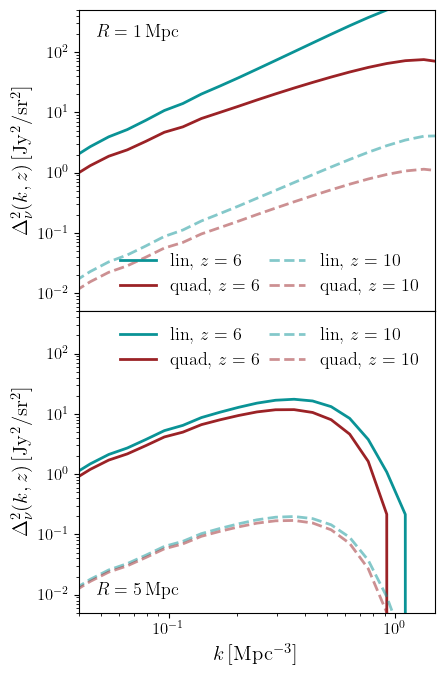

In [10]:

# find closest redshift in the array that was run by oLIMpus
iz_val_0 = min(range(len(line_model.LIM_coeff.zintegral)), key=lambda i: np.abs((line_model.LIM_coeff.zintegral[i]-use_z[0]))) 
iz_val_1 = min(range(len(line_model.LIM_coeff.zintegral)), key=lambda i: np.abs((line_model.LIM_coeff.zintegral[i]-use_z[1]))) 

fig, axes = plt.subplots(2, 1, figsize=(4.7, 7), sharex=True, gridspec_kw={'hspace': 0})

id = 0 
ls = ['-','--']
color=[a.colors[0],'none']
alpha=[1,0.5]

for iz_val in [iz_val_0,iz_val_1]:

    axes[0].loglog(klist,line_model_linear.LIM_pk.Deltasq_LIM[iz_val],color=a.colors[2],label=r'${\rm lin},\,z=%g$'%use_z[id],alpha=alpha[id],ls=ls[id])
    axes[0].loglog(klist,line_model.LIM_pk.Deltasq_LIM[iz_val],color=a.colors[-1],label=r'${\rm quad},\,z=%g$'%use_z[id],alpha=alpha[id],ls=ls[id])

    axes[1].loglog(klist,line_model_large_lin.LIM_pk.Deltasq_LIM[iz_val],color=a.colors[2],label=r'${\rm lin},\,z=%g$'%use_z[id],alpha=alpha[id],ls=ls[id])
    axes[1].loglog(klist,line_model_large.LIM_pk.Deltasq_LIM[iz_val],color=a.colors[-1],label=r'${\rm quad},\,z=%g$'%use_z[id],alpha=alpha[id],ls=ls[id])

    id += 1

axes[0].text(0.05, 0.95, r'$R=%g\,{\rm Mpc}$'%round(line_model.LP._R,1), transform=axes[0].transAxes,
             fontsize=13, verticalalignment='top')
axes[0].set_ylabel(r'$\Delta^2_{\nu}(k,z)\,[{\rm Jy^2/sr^2}]$',fontsize=15)
axes[0].set_xlabel(r'$k\,[{\rm Mpc^{-3}}]$',fontsize=15)
axes[0].legend(fontsize=13,columnspacing=0.5,loc=4,ncol=2)

axes[1].text(0.05, 0.1, r'$R=%g\,{\rm Mpc}$'%round(line_model_large.LP._R,1), transform=axes[1].transAxes,
             fontsize=13, verticalalignment='top')
axes[1].set_ylabel(r'$\Delta^2_{\nu}(k,z)\,[{\rm Jy^2/sr^2}]$',fontsize=15)
axes[1].set_xlabel(r'$k\,[{\rm Mpc^{-3}}]$',fontsize=15)
axes[1].legend(fontsize=13,columnspacing=0.5,loc=1,ncol=2)

axes[0].set_ylim(5e-3,5e2)
axes[1].set_ylim(5e-3,5e2)

axes[0].set_xlim(4e-2,1.5)
axes[1].set_xlim(4e-2,1.5)

plt.tight_layout()

To compare the power spectrum with shot noise, the relevant quantity is **_Pk_LIM_tot**.

We compare the cases with / without shot noise and with / without RSD using the quadratic lognormal.

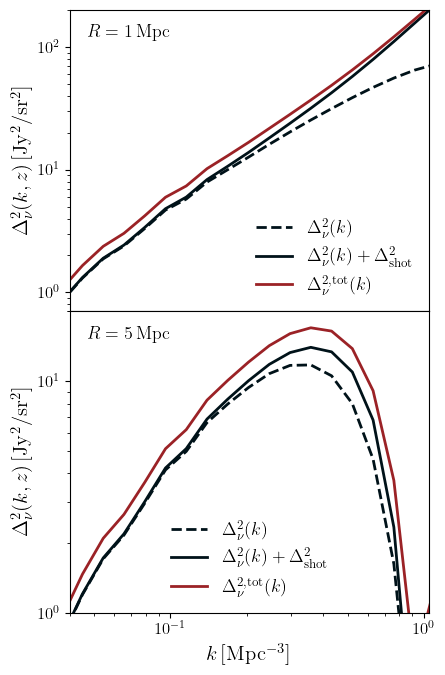

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(4.7, 7), sharex=True, gridspec_kw={'hspace': 0})

axes[0].loglog(klist,line_model.LIM_pk.Deltasq_LIM[iz_val_0],color=a.colors[0],label=r'$\Delta^2_\nu(k)$',ls='--')
axes[0].loglog(klist,line_model.LIM_pk._Pk_LIM_tot[iz_val_0]*klist**3/2/np.pi**2,color=a.colors[0],label=r'$\Delta^2_\nu(k)+\Delta^2_{\rm shot}$',ls='-')
axes[0].loglog(klist,(klist**3/2/np.pi**2)*line_model_spherical.LIM_pk._Pk_LIM_tot[iz_val_0],color=a.colors[-1],label=r'$\Delta_\nu^{\rm 2,tot}(k)$',)

plt.text(0.05, 0.95, r'$R=%g\,{\rm Mpc}$'%round(line_model.LP._R,1), transform=axes[0].transAxes,
             fontsize=13, verticalalignment='top')
axes[0].set_ylabel(r'$\Delta^2_{\nu}(k,z)\,[{\rm Jy^2/sr^2}]$',fontsize=15)
axes[0].set_xlabel(r'$k\,[{\rm Mpc^{-3}}]$',fontsize=15)
axes[0].legend(fontsize=13,columnspacing=0.5,loc=4,ncol=1)


axes[1].loglog(klist,line_model_large.LIM_pk.Deltasq_LIM[iz_val_0],color=a.colors[0],label=r'$\Delta^2_\nu(k)$',ls='--')
axes[1].loglog(klist,line_model_large.LIM_pk._Pk_LIM_tot[iz_val_0]*klist**3/2/np.pi**2,color=a.colors[0],label=r'$\Delta^2_\nu(k)+\Delta^2_{\rm shot}$',ls='-')
axes[1].loglog(klist,(klist**3/2/np.pi**2)*line_model_large_spherical.LIM_pk._Pk_LIM_tot[iz_val_0],color=a.colors[-1],label=r'$\Delta_\nu^{\rm 2,tot}(k)$',)

plt.text(0.05, 0.95, r'$R=%g\,{\rm Mpc}$'%round(line_model_large.LP._R,1), transform=axes[1].transAxes,
             fontsize=13, verticalalignment='top')
axes[1].set_ylabel(r'$\Delta^2_{\nu}(k,z)\,[{\rm Jy^2/sr^2}]$',fontsize=15)
axes[1].set_xlabel(r'$k\,[{\rm Mpc^{-3}}]$',fontsize=15)
axes[1].legend(fontsize=13,columnspacing=0.5,loc=8,ncol=1)

axes[0].set_ylim(7e-1,2e2)
axes[1].set_ylim(1.,2e1)

axes[0].set_xlim(4e-2,1.05)
axes[1].set_xlim(4e-2,1.05)


plt.tight_layout()

## Compute the 21-cm auto-power spectrum

oLIMpus inherits from Zeus21 the capability of computing the 21-cm auto power spectrum. This is collected in the zeus_... outputs of the class defined in **analysis.py** model. 

Some of the inputs are not relevant for the 21-cm computation:
- _R : 21-cm is non-local, hence the signal is integrated over an array of $R$
- shot noise : for the moment, we do not include shot noise in the 21-cm computation
- all parameters related with the line emission

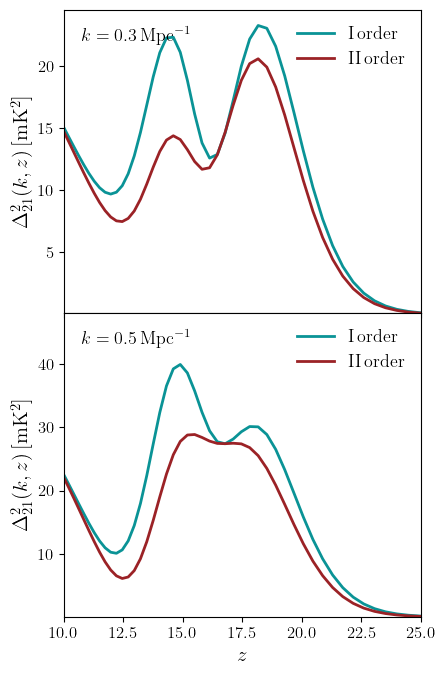

In [12]:
fig, axes = plt.subplots(2, 1, figsize=(4.7, 7), sharex=True, gridspec_kw={'hspace': 0})

id_1 = 35
id_2 = 38

axes[0].plot(line_model_linear.zeus_coeff.zintegral,line_model_linear.zeus_pk.Deltasq_T21[:,id_1], '-', label=r'$\rm I\,order$',color=a.colors[2])
axes[0].plot(line_model.zeus_coeff.zintegral,line_model.zeus_pk.Deltasq_T21[:,id_1], '-', label=r'$\rm II\,order$',color=a.colors[-1])
axes[0].set_ylabel(r'$\Delta^2_{21}(k,z)\,[{\rm mK^2}]$',fontsize=15)
axes[0].text(0.05, 0.95, r'$k=%g\,{\rm Mpc}^{-1}$'%round(klist[id_1],2), transform=axes[0].transAxes,
             fontsize=13, verticalalignment='top')
axes[0].set_xlim(10,25)
axes[0].set_ylim(1e-1,24.5)
axes[0].legend(loc=1,fontsize=13)

axes[1].plot(line_model_linear.zeus_coeff.zintegral,line_model_linear.zeus_pk.Deltasq_T21[:,id_2], '-', label=r'$\rm I\,order$',color=a.colors[2])
axes[1].plot(line_model.zeus_coeff.zintegral,line_model.zeus_pk.Deltasq_T21[:,id_2], '-', label=r'$\rm II\,order$',color=a.colors[-1])
axes[1].set_ylabel(r'$\Delta^2_{21}(k,z)\,[{\rm mK^2}]$',fontsize=15)
axes[1].text(0.05, 0.95, r'$k=%g\,{\rm Mpc}^{-1}$'%round(klist[id_2],1), transform=axes[1].transAxes,
             fontsize=13, verticalalignment='top')
axes[1].set_ylim(1e-1,48)
axes[1].set_xlim(10,25)
axes[1].legend(fontsize=13,loc=1)
axes[1].set_xlabel(r'$z$',fontsize=15)


plt.tight_layout()

## Cross power spectrum

oLIMpus allows the user to compute multiple line auto-power spectra, as well as the cross-power spectra between them.

To compute them, instead of the collective class line_model we run each output separately.

In [13]:
# run CLASS to get cosmology 
ClassyC = a.runclass(a.Cosmo_Parameters_Input(**a.CosmoParams_input_fid))

In [14]:
# define Ha parameter set 
LineParams_Input_val_Ha = a.LineParams_Input(
    LINE = 'Ha', # which line
    LINE_MODEL = 'Yang24', # model of the line luminosity
    OBSERVABLE_LIM = 'Inu', # observe intensity in Jy/sr or mK
    _R = 1., # resolution for smoothing
    sigma_LMh = 0., # stochasticity in the L-SFR relation
    shot_noise = True, # add shot noise to the power spectrum
    quadratic_lognormal = True # use 1st or 2nd order in the SFRD and line lognormal approximation MOVE TO USER PARAMS
)

# setup line parameters (the user, cosmo and astro parameters are the same as the previous runs)
LP_Ha = a.Line_Parameters(LineParams_Input_val_Ha,line_model.UP)

# run LIM_modeling.py
LIM_coeff_Ha = a.get_LIM_coefficients(LP_Ha, line_model.AP, line_model.CP, line_model.HMFcl, line_model.UP, zmin=5.)

# run correlations_LIM and build the structures required to estimate the power spectra (this is independent from the line you choose)
# 1) get correlations for the auto power spectrum; the inputs are the line and cosmo params and the CLASS realization
LIM_corr_Ha = a.Correlations_LIM(LP_Ha, line_model.CP, ClassyC)

# get auto-power specrum
LIM_pk_Ha = a.Power_Spectra_LIM(LIM_corr_Ha, # correlation structure 
                                LIM_coeff_Ha, # line coefficients 
                                LP_Ha, # line parameters
                                line_model.CP, # cosmo parameters
                                line_model.UP, # user parameters
                                RSD_MODE = 0 ,) # RSD 

# 2) compute the structures for the cross spectrum; the inputs are the first line params, the cosmo params, the CLASS realization and the second line params
LIM_corr_Ha_cross = a.Correlations_LIM(line_model.LP, # first line 
                                       line_model.CP, 
                                       ClassyC, 
                                       LP_Ha) # second line

# get cross power spectrum 
LIM_pk_cross_OIIIHa = a.Power_Spectra_LIM(LIM_corr_Ha_cross, # correlation structure (no matter what line)
                                          line_model.LIM_coeff, # coefficient structure for the first line
                                          line_model.LP, # first line params
                                          line_model.CP, # cosmo params
                                          line_model.UP, # user params
                                          0, # RSD
                                          LIM_coeff_Ha, # coefficient structure for the second line 
                                          LP_Ha) # second line params


/mnt/DATA/programs/anaconda3/envs/oLIMpus/lib/python3.10/site-packages/oLIMpus/LIM_luminosities.py:37: RuntimeWarning: divide by zero encountered in power
  L_line = 2. * N * dotM / ((dotM / SFR1)**(-alpha) + (dotM / SFR1)**beta)
/mnt/DATA/programs/anaconda3/envs/oLIMpus/lib/python3.10/site-packages/oLIMpus/LIM_luminosities.py:39: RuntimeWarning: divide by zero encountered in log10
  log10_L = np.log10(L_line)


In [15]:
# same for CII

# set parameters
LineParams_Input_val_CII = a.LineParams_Input(
    LINE = 'CII', # which line
    LINE_MODEL = 'Lagache18', # model of the line luminosity
    OBSERVABLE_LIM = 'Inu', # observe intensity in Jy/sr or mK
    _R = 1., # resolution for smoothing
    sigma_LMh = 0., # stochasticity in the L-SFR relation
    shot_noise = True, # add shot noise to the power spectrum
    quadratic_lognormal = True # use 1st or 2nd order in the SFRD and line lognormal approximation MOVE TO USER PARAMS
)
LP_CII = a.Line_Parameters(LineParams_Input_val_CII,line_model.UP)

# get coefficients
LIM_coeff_CII = a.get_LIM_coefficients(LP_CII, line_model.AP, line_model.CP, line_model.HMFcl, line_model.UP, zmin=5.)

# get correlations and auto-power spectrum
LIM_corr_CII = a.Correlations_LIM(LP_CII, line_model.CP, ClassyC)
LIM_pk_CII = a.Power_Spectra_LIM(LIM_corr_CII, LIM_coeff_CII, LP_CII, line_model.CP, line_model.UP, RSD_MODE=0.,)

# get correlations and cross-power spectrum 
LIM_corr_CII_cross = a.Correlations_LIM(line_model.LP, line_model.CP, ClassyC,LP_CII)
LIM_pk_cross_OIIICII = a.Power_Spectra_LIM(LIM_corr_CII_cross, line_model.LIM_coeff, line_model.LP, line_model.CP, line_model.UP, 0,LIM_coeff_CII,LP_CII)


/mnt/DATA/programs/anaconda3/envs/oLIMpus/lib/python3.10/site-packages/oLIMpus/LIM_luminosities.py:105: RuntimeWarning: divide by zero encountered in log10
  log10_L = alpha_SFR * np.log10(dotM) + beta_SFR


In [16]:
# same for CO 2-1

# get parameters
LineParams_Input_val_CO = a.LineParams_Input(
    LINE = 'CO21', # which line
    LINE_MODEL = 'Yang21', # model of the line luminosity
    OBSERVABLE_LIM = 'Inu', # observe intensity in Jy/sr or mK
    _R = 5., # resolution for smoothing - larger for illustration purposes
    sigma_LMh = 0., # stochasticity in the L-SFR relation
    shot_noise = True, # add shot noise to the power spectrum
    quadratic_lognormal = True # use 1st or 2nd order in the SFRD and line lognormal approximation MOVE TO USER PARAMS
)
LP_CO = a.Line_Parameters(LineParams_Input_val_CO,line_model.UP)

# get coefficients
LIM_coeff_CO = a.get_LIM_coefficients(LP_CO, line_model.AP, line_model.CP, line_model.HMFcl, line_model.UP, zmin=5.)

# get correlation structure and auto-power spectrum
LIM_corr_CO = a.Correlations_LIM(LP_CO, line_model.CP, ClassyC)
LIM_pk_CO = a.Power_Spectra_LIM(LIM_corr_CO, LIM_coeff_CO, LP_CO, line_model.CP, line_model.UP, RSD_MODE=0.,)

# get correlation structure and cross-power spectrum 
LIM_corr_CO_cross = a.Correlations_LIM(line_model.LP, line_model.CP, ClassyC,LP_CO)
LIM_pk_cross_OIIICO = a.Power_Spectra_LIM(LIM_corr_CO_cross, line_model.LIM_coeff, line_model.LP, line_model.CP, line_model.UP, 0,LIM_coeff_CO,LP_CO)


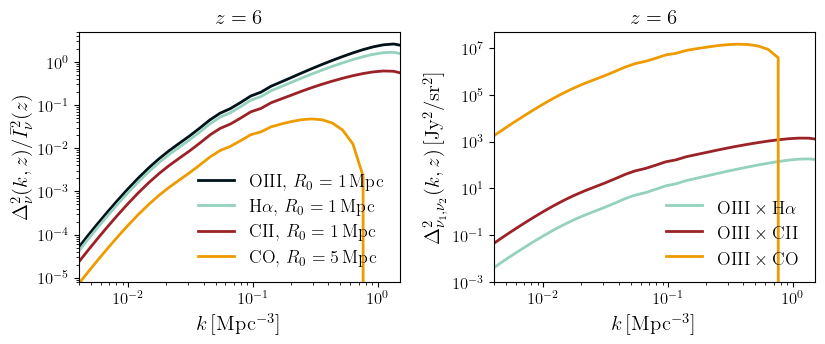

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(8.5, 3.7),)


axes[0].loglog(klist,line_model.LIM_pk.Deltasq_LIM[iz_val_0]/line_model.LIM_coeff.Inu_bar[iz_val_0]**2,color=a.colors[0],label=r'${\rm OIII},\,R_0=%g\,{\rm Mpc}$'%line_model.LP._R,)
axes[0].loglog(klist,LIM_pk_Ha.Deltasq_LIM[iz_val_0]/LIM_coeff_Ha.Inu_bar[iz_val_0]**2,color=a.colors[3],label=r'${\rm H\alpha},\,R_0=%g\,{\rm Mpc}$'%LineParams_Input_val_Ha._R,)
axes[0].loglog(klist,LIM_pk_CII.Deltasq_LIM[iz_val_0]/LIM_coeff_CII.Inu_bar[iz_val_0]**2,color=a.colors[-1],label=r'${\rm CII},\,R_0=%g\,{\rm Mpc}$'%LineParams_Input_val_CII._R,)
axes[0].loglog(klist,LIM_pk_CO.Deltasq_LIM[iz_val_0]/LIM_coeff_CO.Inu_bar[iz_val_0]**2,color=a.colors[5],label=r'${\rm CO},\,R_0=%g\,{\rm Mpc}$'%LineParams_Input_val_CO._R,)

axes[0].set_ylabel(r'${\Delta^2_{\nu}(k,z)}/{\bar{I}_\nu^2(z)}$',fontsize=15)
axes[0].set_xlabel(r'$k\,[{\rm Mpc^{-3}}]$',fontsize=15)
axes[0].legend(fontsize=13,columnspacing=0.5,loc=4,ncol=1)


axes[1].loglog(klist,LIM_pk_cross_OIIIHa.Deltasq_LIM[iz_val_0],color=a.colors[3],label=r'${\rm OIII\times H\alpha}$',)
axes[1].loglog(klist,LIM_pk_cross_OIIICII.Deltasq_LIM[iz_val_0],color=a.colors[-1],label=r'${\rm OIII\times CII}$',)
axes[1].loglog(klist,LIM_pk_cross_OIIICO.Deltasq_LIM[iz_val_0],color=a.colors[5],label=r'${\rm OIII\times CO}$',)

axes[1].set_ylabel(r'$\Delta^2_{\nu_1,\nu_2}(k,z)\,[{\rm Jy^2/sr^2}]$',fontsize=15)
axes[1].set_xlabel(r'$k\,[{\rm Mpc^{-3}}]$',fontsize=15)
axes[1].legend(fontsize=13,columnspacing=0.5,loc=4,ncol=1)

axes[0].set_title(r'$z=%g$'%round(LIM_coeff_CII.zintegral[iz_val_0],1),fontsize=15)
axes[1].set_title(r'$z=%g$'%round(LIM_coeff_CII.zintegral[iz_val_0],1),fontsize=15)
axes[0].set_ylim(8e-6,5)
axes[1].set_ylim(1e-3,5e7)

axes[0].set_xlim(4e-3,1.5)
axes[1].set_xlim(4e-3,1.5)

plt.tight_layout()

## Compare different models

oLIMpus includes by default different line models. For example, for the optical and UV lines models based on the THESAN simulation are also included. 
They can be accessed simply changing the LINE_MODEL input in the main collective class.

In [18]:
line_model_THESAN = a.run_oLIMpus('OIII',LINE_MODEL = 'THESAN21', _R = 1., shot_noise= True, quadratic_lognormal=True, astromodel=0, ZMIN=5., RSD_MODE=0)

/mnt/DATA/programs/anaconda3/envs/oLIMpus/lib/python3.10/site-packages/oLIMpus/LIM_luminosities.py:67: RuntimeWarning: divide by zero encountered in log10
  log10_SFR = np.log10(dotM)


Moreover, one can include stochasticity in the line luminoisty-SFR or line luminosity-halo mass relation. In this case, the relation becomes
$$
\tilde{L}(M_h,z) =\int dL'L'p(L'|M_h,z)=\int \frac{dL'}{\sqrt{2\pi}\sigma_L} \exp\left[-\frac{(\log L'-\mu(M_h,z))^2}{2\sigma_L^2}\right]
$$

To account for stochasticity, the user simply needs to change the sigma_LMh input parameter.

In [19]:
line_model_stoch = a.run_oLIMpus('OIII',LINE_MODEL = 'Yang24', _R = 1., shot_noise= True, quadratic_lognormal=True, astromodel=0, ZMIN=5., RSD_MODE=0,sigma_LMh=0.3*u.dex)

/mnt/DATA/programs/anaconda3/envs/oLIMpus/lib/python3.10/site-packages/oLIMpus/LIM_modeling.py:258: RuntimeWarning: divide by zero encountered in log
  log_muL = np.log(10**log10_L)


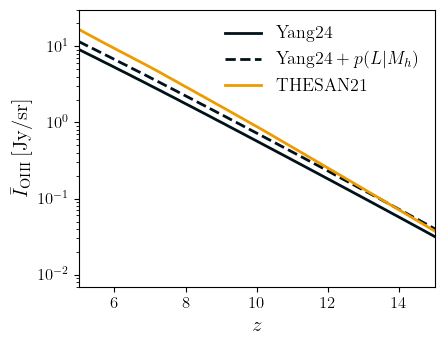

In [20]:
plt.figure(figsize=(4.7, 3.7))
plt.semilogy(line_model.LIM_coeff.zintegral,line_model.LIM_coeff.Inu_bar,label=r'$\rm Yang24$')
plt.semilogy(line_model.LIM_coeff.zintegral,line_model_stoch.LIM_coeff.Inu_bar,ls='--',color=a.colors[0],label=r'${\rm Yang24}+p(L|M_h)$')
plt.semilogy(line_model.LIM_coeff.zintegral,line_model_THESAN.LIM_coeff.Inu_bar,label=r'$\rm THESAN21$',color=a.colors[5])
plt.xlabel(r'$z$',fontsize=15)
plt.xlim(5,15)
plt.ylim(7e-3,3e1)
plt.ylabel(r'$\bar{I}_{\rm OIII}\,[{\rm Jy/sr}]$',fontsize=15)
plt.legend(fontsize=13)

plt.tight_layout()

For further information, the user can refer to the documentation of each module, or contact the author at:

libanore@bgu.ac.il